In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import matplotlib.dates as mdates
import numpy as np
from datetime import timedelta
from tqdm import tqdm
import matplotlib.animation as animation

In [9]:
#d = pd.read_csv('./processed_opc/DASH_SAMP_PARAM_RESAMP_240528.csv')
d = pd.read_csv('./processed_opc/DASH_SAMP_PARAM_RESAMP_240606.csv')

In [10]:
#d = d[d['UpSt_Dia']>350]
#d =d.reset_index(drop=['index'])

In [11]:
d

,Samp_Num,Start_Date_Time_UTC,Mid_Date_Time_UTC,Stop_Date_Time_UTC,Samp_Time_s,data_points,UpSt_Dia,HM_RH_Av,HM_RH_Sdev,HO_RH_Av,...,HO_Bin63,HO_Bin64,HO_Bin65,HO_Bin66,HO_Bin67,HO_Bin68,HO_Bin69,HO_Bin70,HO_Bin71,HO_Bin72
0,1,2024-06-06 10:58:37,2024-06-06 10:58:37.500000,2024-06-06 10:58:38,2.0,1,200.0,83.433333,0.611010,56.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2024-06-06 10:58:41,2024-06-06 10:58:41.500000,2024-06-06 10:58:42,2.0,1,200.0,82.633333,0.057735,57.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2024-06-06 10:58:42,2024-06-06 10:58:42.500000,2024-06-06 10:58:43,2.0,1,200.0,82.700000,0.100000,58.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2024-06-06 10:58:46,2024-06-06 10:58:47,2024-06-06 10:58:48,3.0,2,200.0,83.925000,0.478714,59.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2024-06-06 10:58:48,2024-06-06 10:58:49,2024-06-06 10:58:50,3.0,2,200.0,84.775000,0.573730,60.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,5648,2024-06-06 18:40:29,2024-06-06 18:40:30.500000,2024-06-06 18:40:32,4.0,3,200.0,85.260000,0.789303,83.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,5649,2024-06-06 18:40:32,2024-06-06 18:40:33.500000,2024-06-06 18:40:35,4.0,3,200.0,83.620000,0.840833,83.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5649,5650,2024-06-06 18:40:35,2024-06-06 18:40:36,2024-06-06 18:40:37,3.0,2,200.0,82.775000,0.125831,83.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5650,5651,2024-06-06 18:40:37,2024-06-06 18:40:38,2024-06-06 18:40:39,3.0,2,200.0,82.900000,0.294392,83.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bins = pd.read_csv('./data/DASH_Bins_2023.csv')

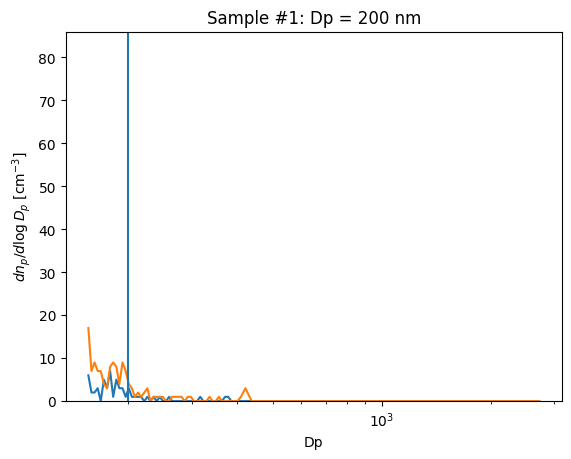

In [13]:
DO_Bin = [col for col in d.columns if 'DO_Bin' in col]
HO_Bin = [col for col in d.columns if 'HO_Bin' in col]

fig,ax = plt.subplots()
for i in range(0,len(d)):
    ax.set_ylim([0,d.loc[:, DO_Bin + HO_Bin].max().max()])
    ax.plot(bins['Dp_nm'][:-1], d.loc[i, DO_Bin])
    ax.plot(bins['Dp_nm'][:-1], d.loc[i, HO_Bin])
    ax.set_xscale('log')
    ax.set_xlabel('Dp')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    ax.set_title('Sample #' + str(d.loc[i, 'Samp_Num']) + ': Dp = ' + str(round(d.loc[i, 'UpSt_Dia'])) + ' nm')
    ax.vlines(d.loc[i, 'UpSt_Dia'],0,d.loc[:, DO_Bin + HO_Bin].max().max())
    break

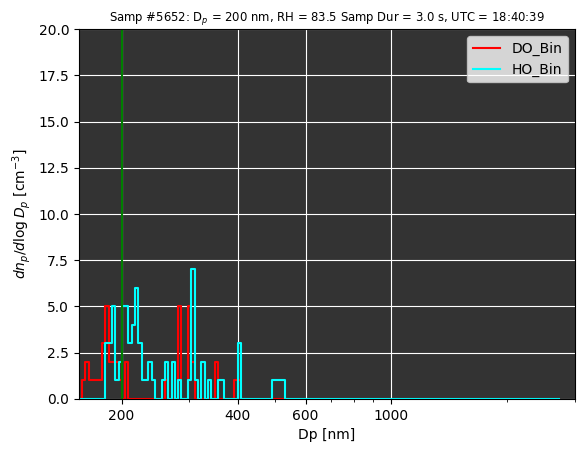

In [14]:
fig, ax = plt.subplots()
m_r = 20
def init():
    max_y = d.loc[:, DO_Bin + HO_Bin].max().max()
    ax.set_xscale('log')
    ax.set_xlim(bins['Dp_nm'].min(), bins['Dp_nm'].max())
    #ax.set_ylim([0,d.loc[:, DO_Bin + HO_Bin].max().max()])
    #ax.set_ylim([0,max_y])
    ax.set_ylim([0,m_r])
    ax.set_xscale('log')
    ax.set_xlabel('Dp [nm]')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    # Custom ticks and labels
    ticks = [200,400,600,1000]
    labels = ['200','400','600','1000']

    # Set custom tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    return fig,

def update(i):
    max_y = d.loc[i, DO_Bin + HO_Bin].max().max()#d.loc[:, DO_Bin + HO_Bin].max().max()
    ax.clear()
    ax.set_ylim([0,m_r])
    ax.set_xscale('log')
    ax.step(bins['Dp_nm'][:-1], d.loc[i, DO_Bin], label='DO_Bin', color='r')
    ax.step(bins['Dp_nm'][:-1], d.loc[i, HO_Bin], label='HO_Bin', color='cyan')
    ax.set_facecolor((0.2, 0.2, 0.2))
    ax.grid(c = 'w')
    ax.set_xscale('log')
    ax.set_title('Samp #' + str(d.loc[i, 'Samp_Num']) + ': D$_p$ = ' + str(round(d.loc[i, 'UpSt_Dia'])) + ' nm, RH = ' + str(round(d.loc[i, 'HM_RH_Av'],1))  + ' Samp Dur = '+ str(round(d.loc[i, 'Samp_Time_s'], 1)) + ' s, UTC = ' + str(d.loc[i, 'Start_Date_Time_UTC'])[11:19], fontsize='small')
    #ax.vlines(d.loc[i, 'UpSt_Dia'],0,max_y, color='r')
    ax.vlines(d.loc[i, 'UpSt_Dia'],0,m_r, color='green')
    ax.legend()
    # Custom ticks and labels
    ticks = [200,400,600,1000]
    labels = ['200','400','600','1000']

    # Set custom tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Dp [nm]')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    return fig,

ani = animation.FuncAnimation(fig, update, frames=len(d), init_func=init, blit=False)

# Save the animation
writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('./figures/dist-2024_06_06.mp4', writer=writer, dpi=100)

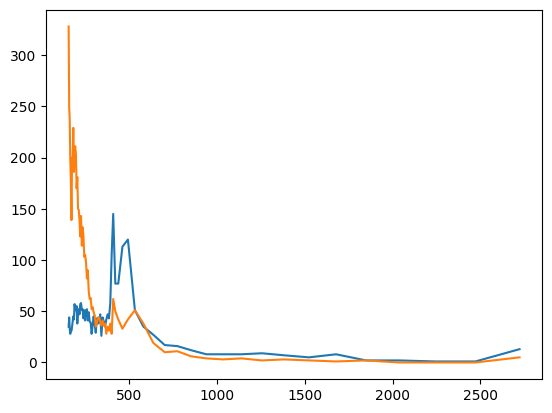

In [23]:
plt.plot(bins['Dp_nm'][:-1], d.loc[:, DO_Bin].max())
plt.plot(bins['Dp_nm'][:-1], d.loc[:, HO_Bin].max())